### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [3]:
from scipy.stats import uniform
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency


In [4]:
df = pd.read_csv('C:/Users/Luswata/Dropbox/ML_AI_UCBerkeley/Data/dataset_31_credit-g.csv')
df.shape

(1000, 21)

In [5]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [36]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [37]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [33]:
# Identify and drop any duplicates
duplicates = df[df.duplicated()]
df.drop_duplicates(inplace=True)
df.shape

(1000, 21)

In [6]:
df.columns[df.columns.str.contains("NaN")]

Index([], dtype='object')

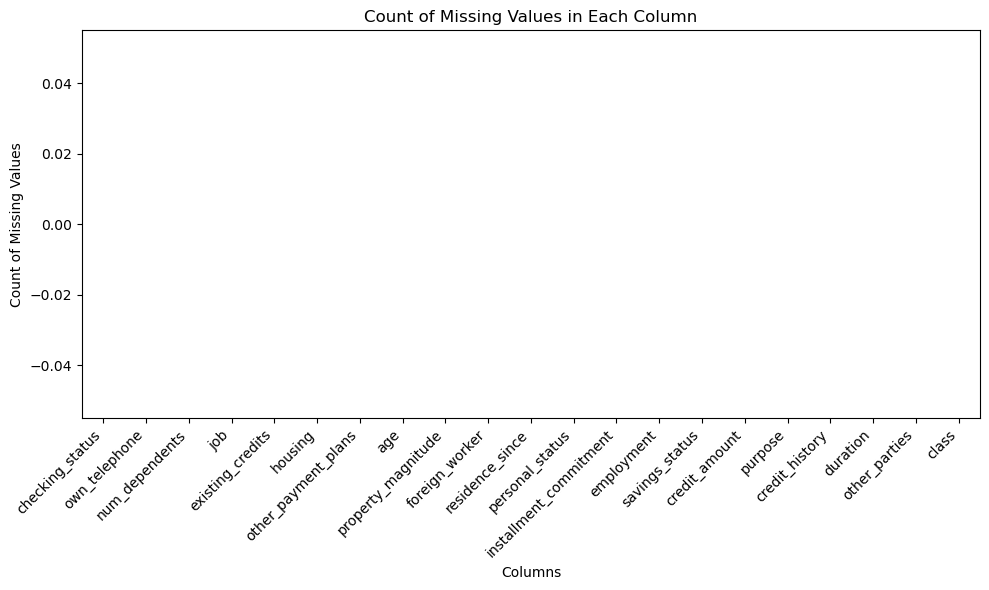

In [35]:
# Check mising rates 
missing_values_count = df.isnull().sum().sort_values()

plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot (optional)
plt.show()

In [5]:
# Status of existing checking account, in Deutsche Mark.
crosstab = pd.crosstab(df['checking_status'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['checking_status'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

class            bad  good
checking_status           
'0<=X<200'       105   164
'<0'             135   139
'>=200'           14    49
'no checking'     46   348
class                 bad      good
checking_status                    
'0<=X<200'       0.390335  0.609665
'<0'             0.492701  0.507299
'>=200'          0.222222  0.777778
'no checking'    0.116751  0.883249
Chi-square statistic: 123.72094351626559
P-value: 1.2189020722893845e-26
Degrees of freedom: 3
Expected frequencies table:
 [[ 80.7 188.3]
 [ 82.2 191.8]
 [ 18.9  44.1]
 [118.2 275.8]]


Text(0.5, 1.0, 'Box Plot of Duration in months \nGrouped by credit risks (good or bad)')

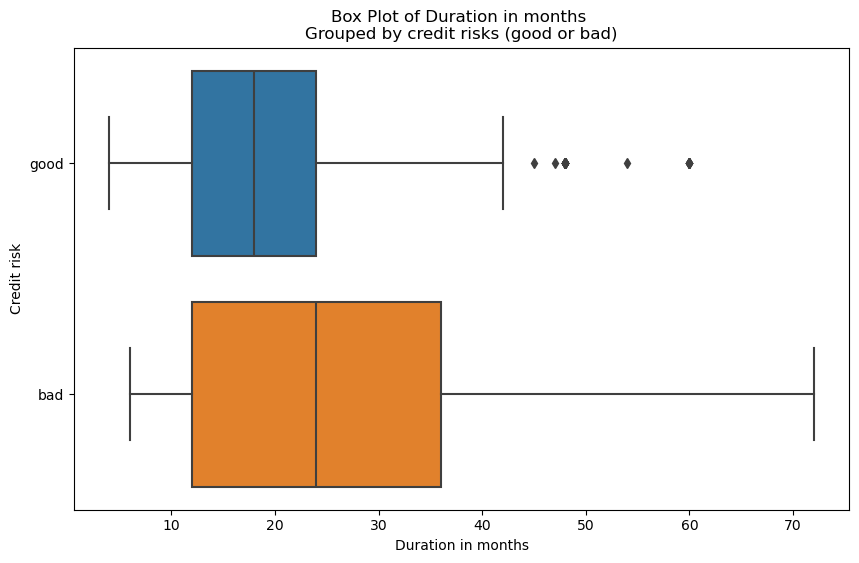

In [8]:
# Duration in months
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='duration', y='class')

plt.ylabel('Credit risk')
plt.xlabel('Duration in months')
plt.title('Box Plot of Duration in months \nby credit risks (good or bad)')


In [9]:

# Credit history (credits taken, paid back duly, delays, critical accounts)
crosstab = pd.crosstab(df['credit_history'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['credit_history'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

## categories 'all paid', 'existing paid' and 'no credits/all paid' need merging into 1

class                             bad  good
credit_history                             
'all paid'                         28    21
'critical/other existing credit'   50   243
'delayed previously'               28    60
'existing paid'                   169   361
'no credits/all paid'              25    15
class                                  bad      good
credit_history                                      
'all paid'                        0.571429  0.428571
'critical/other existing credit'  0.170648  0.829352
'delayed previously'              0.318182  0.681818
'existing paid'                   0.318868  0.681132
'no credits/all paid'             0.625000  0.375000
Chi-square statistic: 61.691396964595505
P-value: 1.2791872956750962e-12
Degrees of freedom: 4
Expected frequencies table:
 [[ 14.7  34.3]
 [ 87.9 205.1]
 [ 26.4  61.6]
 [159.  371. ]
 [ 12.   28. ]]


In [10]:
# Purpose of the credit (car, television,...)
crosstab = pd.crosstab(df['purpose'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['purpose'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)



class                 bad  good
purpose                        
'domestic appliance'    4     8
'new car'              89   145
'used car'             17    86
business               34    63
education              22    28
furniture/equipment    58   123
other                   5     7
radio/tv               62   218
repairs                 8    14
retraining              1     8
class                      bad      good
purpose                                 
'domestic appliance'  0.333333  0.666667
'new car'             0.380342  0.619658
'used car'            0.165049  0.834951
business              0.350515  0.649485
education             0.440000  0.560000
furniture/equipment   0.320442  0.679558
other                 0.416667  0.583333
radio/tv              0.221429  0.778571
repairs               0.363636  0.636364
retraining            0.111111  0.888889
Chi-square statistic: 33.35644686141815
P-value: 0.00011574910079691586
Degrees of freedom: 9
Expected frequencies table:
 [

Text(0.5, 1.0, 'Box Plot of Credit amount \n by credit risks (good or bad)')

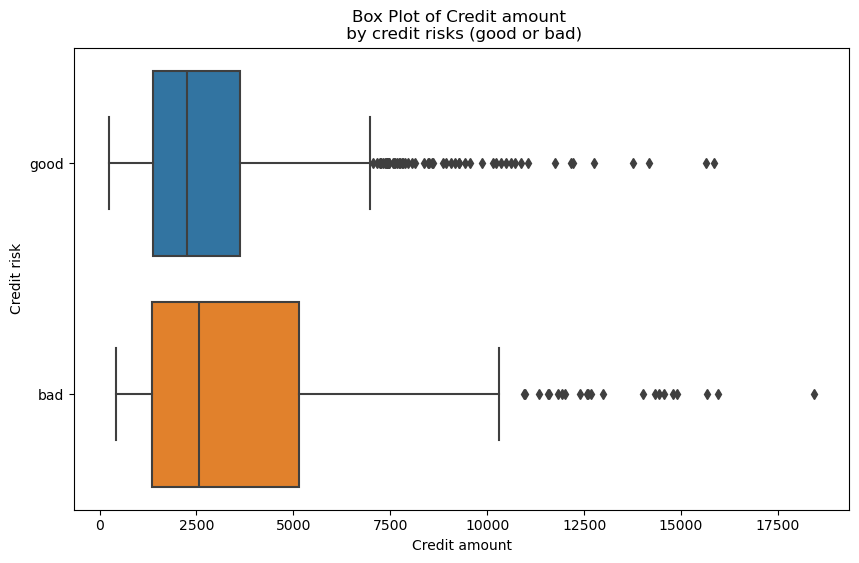

In [11]:
# Credit amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='credit_amount', y='class')

plt.ylabel('Credit risk')
plt.xlabel('Credit amount')
plt.title('Box Plot of Credit amount \n by credit risks (good or bad)')


In [6]:
# Status of savings account/bonds, in Deutsche Mark.
crosstab = pd.crosstab(df['savings_status'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['savings_status'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

class               bad  good
savings_status               
'100<=X<500'         34    69
'500<=X<1000'        11    52
'<100'              217   386
'>=1000'              6    42
'no known savings'   32   151
class                    bad      good
savings_status                        
'100<=X<500'        0.330097  0.669903
'500<=X<1000'       0.174603  0.825397
'<100'              0.359867  0.640133
'>=1000'            0.125000  0.875000
'no known savings'  0.174863  0.825137
Chi-square statistic: 36.098928192418704
P-value: 2.761214238568249e-07
Degrees of freedom: 4
Expected frequencies table:
 [[ 30.9  72.1]
 [ 18.9  44.1]
 [180.9 422.1]
 [ 14.4  33.6]
 [ 54.9 128.1]]


In [12]:
# . Present employment, in number of years.
crosstab = pd.crosstab(df['employment'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['employment'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)



class       bad  good
employment           
'1<=X<4'    104   235
'4<=X<7'     39   135
'<1'         70   102
'>=7'        64   189
unemployed   23    39
class            bad      good
employment                    
'1<=X<4'    0.306785  0.693215
'4<=X<7'    0.224138  0.775862
'<1'        0.406977  0.593023
'>=7'       0.252964  0.747036
unemployed  0.370968  0.629032
Chi-square statistic: 18.3682738466968
P-value: 0.001045452349140254
Degrees of freedom: 4
Expected frequencies table:
 [[101.7 237.3]
 [ 52.2 121.8]
 [ 51.6 120.4]
 [ 75.9 177.1]
 [ 18.6  43.4]]


In [13]:
# . Personal status (married, single,...) and sex.
crosstab = pd.crosstab(df['personal_status'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['personal_status'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

# Categories for personal status need re-formating in the original data

class                 bad  good
personal_status                
'female div/dep/mar'  109   201
'male div/sep'         20    30
'male mar/wid'         25    67
'male single'         146   402
class                      bad      good
personal_status                         
'female div/dep/mar'  0.351613  0.648387
'male div/sep'        0.400000  0.600000
'male mar/wid'        0.271739  0.728261
'male single'         0.266423  0.733577
Chi-square statistic: 9.60521395933605
P-value: 0.02223800546926877
Degrees of freedom: 3
Expected frequencies table:
 [[ 93.  217. ]
 [ 15.   35. ]
 [ 27.6  64.4]
 [164.4 383.6]]


Text(0.5, 1.0, 'Box Plot of Installment rate in percentage of disposable income \n by credit risks (good or bad)')

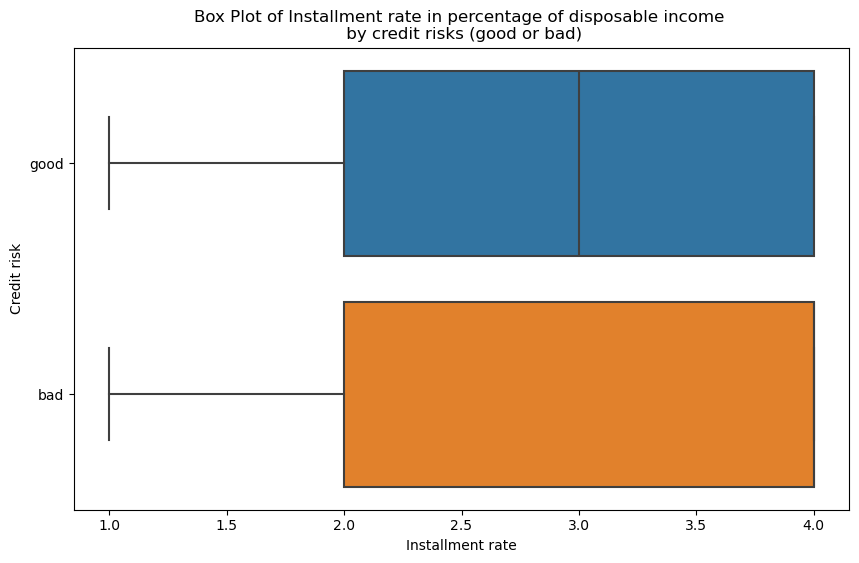

In [14]:
# 8. Installment rate in percentage of disposable income
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='installment_commitment', y='class')

plt.ylabel('Credit risk')
plt.xlabel('Installment rate')
plt.title('Box Plot of Installment rate in percentage of disposable income \n by credit risks (good or bad)')


In [15]:
# installment_commitment
crosstab = pd.crosstab(df['installment_commitment'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['installment_commitment'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

# Categories for personal status need re-formating in the original data

class                   bad  good
installment_commitment           
1                        34   102
2                        62   169
3                        45   112
4                       159   317
class                        bad      good
installment_commitment                    
1                       0.250000  0.750000
2                       0.268398  0.731602
3                       0.286624  0.713376
4                       0.334034  0.665966
Chi-square statistic: 5.476792145153753
P-value: 0.1400333122128481
Degrees of freedom: 3
Expected frequencies table:
 [[ 40.8  95.2]
 [ 69.3 161.7]
 [ 47.1 109.9]
 [142.8 333.2]]


In [16]:
# 10. Other debtors / guarantors
crosstab = pd.crosstab(df['other_parties'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['other_parties'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)


class           bad  good
other_parties            
'co applicant'   18    23
guarantor        10    42
none            272   635
class                bad      good
other_parties                     
'co applicant'  0.439024  0.560976
guarantor       0.192308  0.807692
none            0.299890  0.700110
Chi-square statistic: 6.645366537264244
P-value: 0.036055954027247206
Degrees of freedom: 2
Expected frequencies table:
 [[ 12.3  28.7]
 [ 15.6  36.4]
 [272.1 634.9]]


In [17]:
# Present residence since X years
crosstab = pd.crosstab(df['residence_since'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['residence_since'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)


class            bad  good
residence_since           
1                 36    94
2                 97   211
3                 43   106
4                124   289
class                 bad      good
residence_since                    
1                0.276923  0.723077
2                0.314935  0.685065
3                0.288591  0.711409
4                0.300242  0.699758
Chi-square statistic: 0.7492964483880512
P-value: 0.8615521320413175
Degrees of freedom: 3
Expected frequencies table:
 [[ 39.   91. ]
 [ 92.4 215.6]
 [ 44.7 104.3]
 [123.9 289.1]]


In [18]:
# 12. Property (e.g. real estate)
crosstab = pd.crosstab(df['property_magnitude'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['property_magnitude'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)


class                bad  good
property_magnitude            
'life insurance'      71   161
'no known property'   67    87
'real estate'         60   222
car                  102   230
class                     bad      good
property_magnitude                     
'life insurance'     0.306034  0.693966
'no known property'  0.435065  0.564935
'real estate'        0.212766  0.787234
car                  0.307229  0.692771
Chi-square statistic: 23.719551283864707
P-value: 2.8584415733250017e-05
Degrees of freedom: 3
Expected frequencies table:
 [[ 69.6 162.4]
 [ 46.2 107.8]
 [ 84.6 197.4]
 [ 99.6 232.4]]


Text(0.5, 1.0, 'Box Plot of Age in years \n by credit risks (good or bad)')

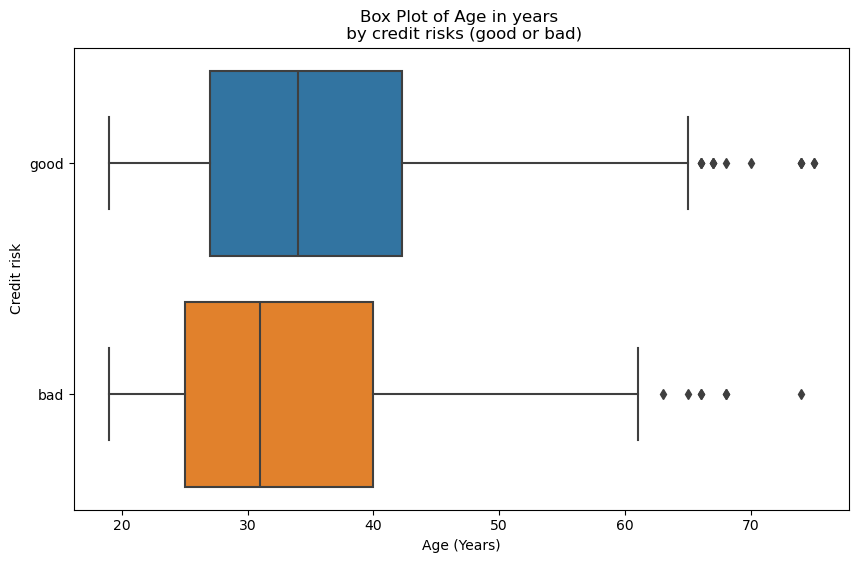

In [19]:
# 13. Age in years
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age', y='class')

plt.ylabel('Credit risk')
plt.xlabel('Age (Years)')
plt.title('Box Plot of Age in years \n by credit risks (good or bad)')

# outlying observations look okay.

In [20]:
# 14. Other installment plans (banks, stores)
crosstab = pd.crosstab(df['other_payment_plans'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['other_payment_plans'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)


class                bad  good
other_payment_plans           
bank                  57    82
none                 224   590
stores                19    28
class                     bad      good
other_payment_plans                    
bank                 0.410072  0.589928
none                 0.275184  0.724816
stores               0.404255  0.595745
Chi-square statistic: 12.839187735866135
P-value: 0.0016293178186473534
Degrees of freedom: 2
Expected frequencies table:
 [[ 41.7  97.3]
 [244.2 569.8]
 [ 14.1  32.9]]


In [21]:
# 15. Housing (rent, own,...)
crosstab = pd.crosstab(df['housing'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['housing'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)


class       bad  good
housing              
'for free'   44    64
own         186   527
rent         70   109
class            bad      good
housing                       
'for free'  0.407407  0.592593
own         0.260870  0.739130
rent        0.391061  0.608939
Chi-square statistic: 18.19984158256362
P-value: 0.00011167465374597684
Degrees of freedom: 2
Expected frequencies table:
 [[ 32.4  75.6]
 [213.9 499.1]
 [ 53.7 125.3]]


In [22]:
# 16. Number of existing credits at this bank
crosstab = pd.crosstab(df['existing_credits'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['existing_credits'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

# collapse categories 2,3, & 4 into >=2

class             bad  good
existing_credits           
1                 200   433
2                  92   241
3                   6    22
4                   2     4
class                  bad      good
existing_credits                    
1                 0.315956  0.684044
2                 0.276276  0.723724
3                 0.214286  0.785714
4                 0.333333  0.666667
Chi-square statistic: 2.6711981349760645
P-value: 0.4451440800083001
Degrees of freedom: 3
Expected frequencies table:
 [[189.9 443.1]
 [ 99.9 233.1]
 [  8.4  19.6]
 [  1.8   4.2]]


In [23]:
# 17. Job
crosstab = pd.crosstab(df['job'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['job'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)



class                        bad  good
job                                   
'high qualif/self emp/mgmt'   51    97
'unemp/unskilled non res'      7    15
'unskilled resident'          56   144
skilled                      186   444
class                             bad      good
job                                            
'high qualif/self emp/mgmt'  0.344595  0.655405
'unemp/unskilled non res'    0.318182  0.681818
'unskilled resident'         0.280000  0.720000
skilled                      0.295238  0.704762
Chi-square statistic: 1.8851560280131707
P-value: 0.5965815918843431
Degrees of freedom: 3
Expected frequencies table:
 [[ 44.4 103.6]
 [  6.6  15.4]
 [ 60.  140. ]
 [189.  441. ]]


In [24]:
# 18. Number of people being liable to provide maintenance for
crosstab = pd.crosstab(df['num_dependents'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['num_dependents'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)



class           bad  good
num_dependents           
1               254   591
2                46   109
class                bad      good
num_dependents                    
1               0.300592  0.699408
2               0.296774  0.703226
Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
 [[253.5 591.5]
 [ 46.5 108.5]]


In [25]:
# 19. Telephone (yes,no)
crosstab = pd.crosstab(df['own_telephone'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['own_telephone'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

# Not statistically significant

class          bad  good
own_telephone           
none           187   409
yes            113   291
class               bad      good
own_telephone                    
none           0.313758  0.686242
yes            0.279703  0.720297
Chi-square statistic: 1.1725585310208857
P-value: 0.27887615430357415
Degrees of freedom: 1
Expected frequencies table:
 [[178.8 417.2]
 [121.2 282.8]]


In [26]:
# 20. Foreign worker (yes,no)
crosstab = pd.crosstab(df['foreign_worker'], df['class'])
print(crosstab)

crosstab1 = pd.crosstab(df['foreign_worker'], df['class'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)



class           bad  good
foreign_worker           
no                4    33
yes             296   667
class                bad      good
foreign_worker                    
no              0.108108  0.891892
yes             0.307373  0.692627
Chi-square statistic: 5.821575915033861
P-value: 0.015830754902852885
Degrees of freedom: 1
Expected frequencies table:
 [[ 11.1  25.9]
 [288.9 674.1]]
